# A MODEL FOR DATA VISUALIZATION ON SUICIDES DATASET RECORDED FROM 1985 TO 2016

In [1]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline
sb.set_style("whitegrid")



In [2]:
data = pd.read_csv('suicides.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [3]:
#checking for missing data
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ MB


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Netherlands,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820,NaN,NaN,NaN,2001.26,8.46906,1985,1995,2002,2008,2016
sex,27820,2,female,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820,NaN,NaN,NaN,242.574,902.048,0,3,25,131,22338
population,27820,NaN,NaN,NaN,1.84479e+06,3.91178e+06,278,97498.5,430150,1.48614e+06,4.38052e+07
suicides/100k pop,27820,NaN,NaN,NaN,12.8161,18.9615,0,0.92,5.99,16.62,224.97
gdp_per_capita ($),27820,NaN,NaN,NaN,16866.5,18887.6,251,3447,9372,24874,126352
generation,27820,6,Generation X,6408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# renaming columns
data.rename(columns={"suicides/100k pop":"suicides_100k","gdp_per_capita ($)":"gdp_per_capita" }, inplace=True)
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'gdp_per_capita', 'generation'],
      dtype='object')

In [7]:
# checking  the categorical column
cat_vars=data.select_dtypes(include='object').columns
cat_vars

Index(['country', 'sex', 'age', 'generation'], dtype='object')

In [8]:
#To print Unique Values and number of categorical Features:
for i in cat_vars:
    print(f'{i}:\n{sorted(data[i].unique())}', len(data[i].unique()))

country:
['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'S

In [9]:
# checking  the numerical column
num_vars=data.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['year', 'suicides_no', 'population', 'suicides_100k', 'gdp_per_capita'], dtype='object')

In [10]:
# To print Unique Values of numerical Features:\n
for i in ['year']:
     print(f'{i}:\n{sorted(data[i].unique())}', len(data[i].unique()))

year:
[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016] 32


In [11]:
data

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309,Generation Z


## DATA VISUALIZATION

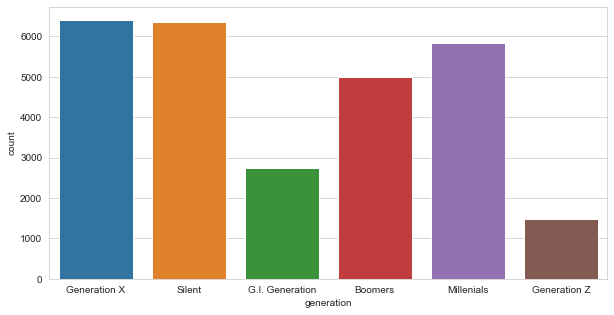

In [12]:
plt.figure(figsize=(10,5))
sb.countplot(data.generation)
plt.show()

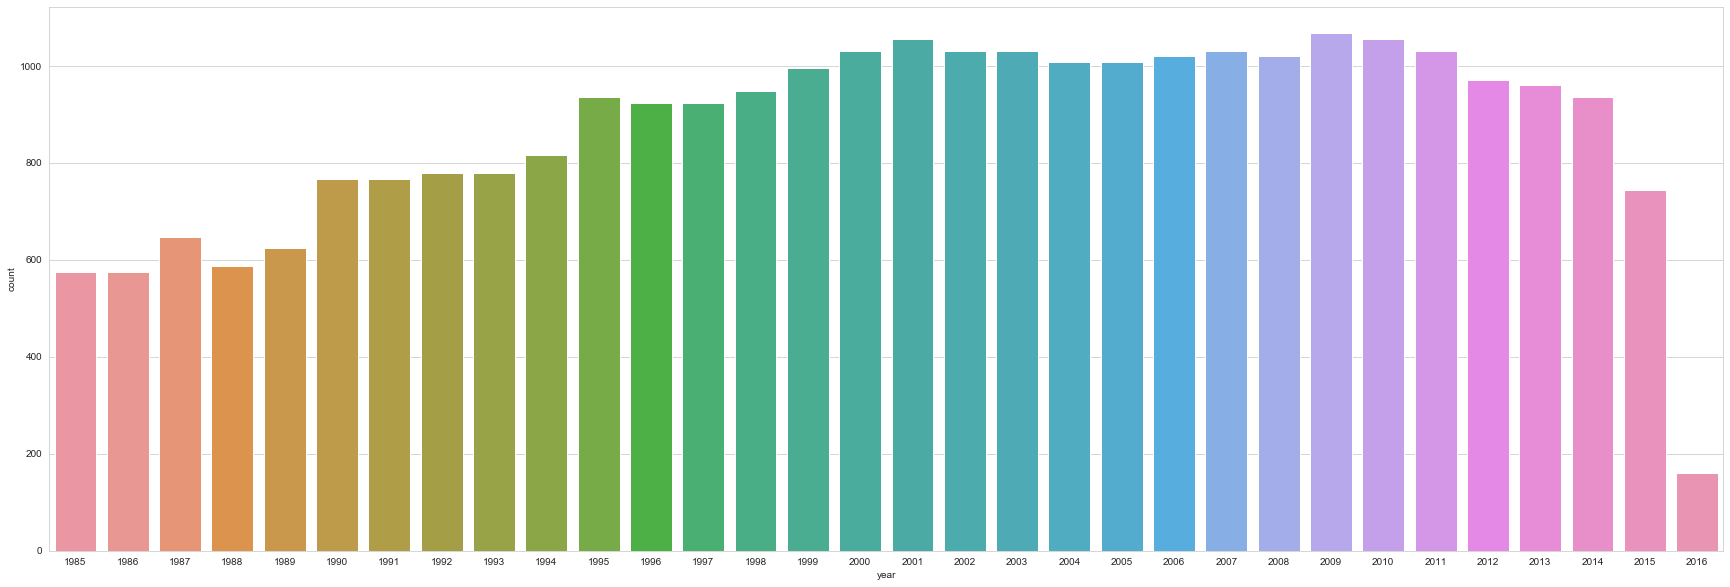

In [13]:
plt.figure(figsize=(30,10))
sb.countplot(data.year)
plt.show()

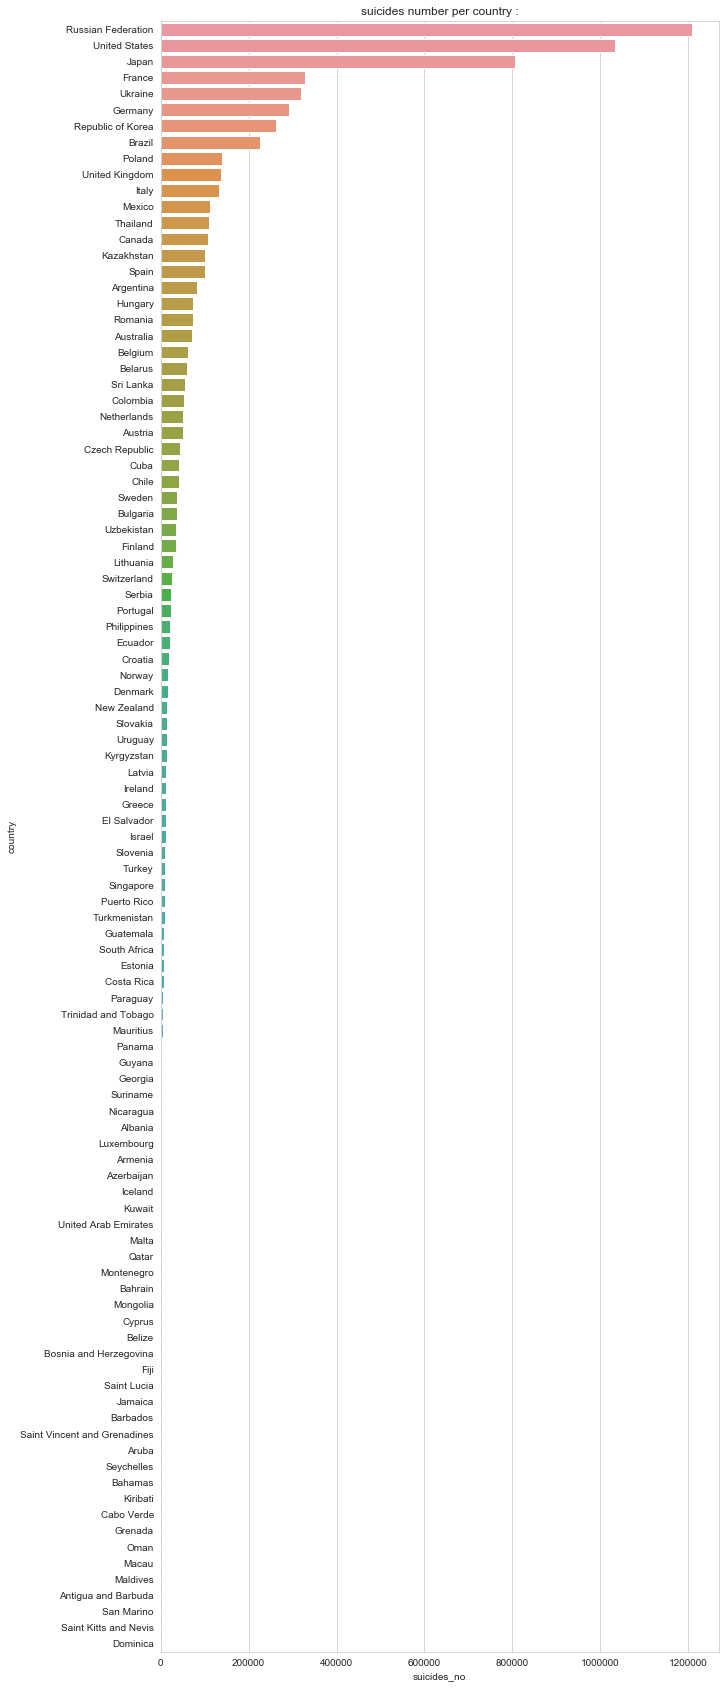

In [14]:
# checking suicides number per country 
suicides_per_country=pd.DataFrame(data.groupby("country")["suicides_no"].sum().sort_values(ascending=False))
suicides_per_country.reset_index(inplace=True)

plt.figure(figsize=(10, 30));
sb.barplot(x="suicides_no", y="country", data=suicides_per_country);
plt.title('suicides number per country :');


From the figure above, we can see that Russian Federation has the highest number of suicides 

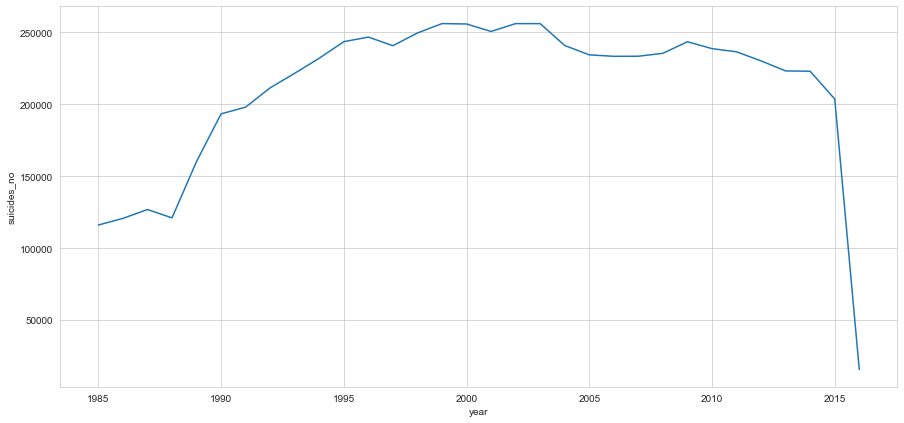

In [15]:
# checking suicides number per year 
suicides_per_year=pd.DataFrame(data.groupby("year")["suicides_no"].sum().sort_values(ascending=False))
suicides_per_year.reset_index(inplace=True)

plt.figure(figsize=(15,7))
sb.lineplot(suicides_per_year['year'],suicides_per_year['suicides_no'])
plt.show()

the number of suicides went high from year 1000 to 2010 and start dropping by 2011

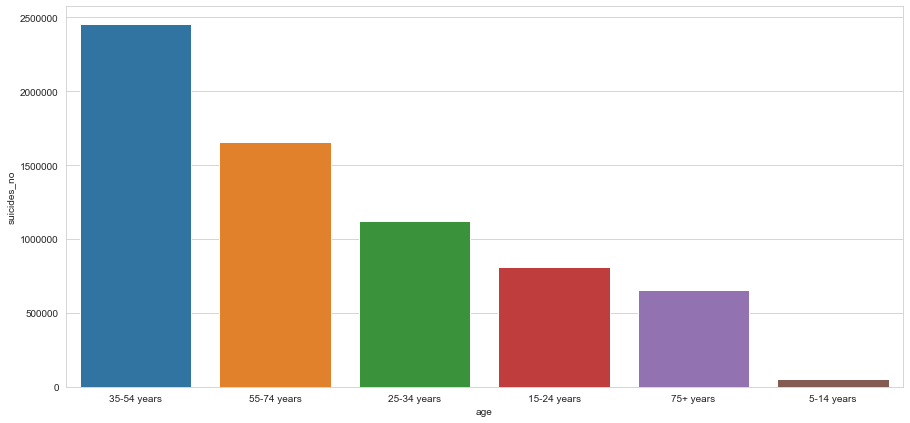

In [16]:
#checking suicides number per age 
suicides_per_age=pd.DataFrame(data.groupby("age")["suicides_no"].sum().sort_values(ascending=False))
suicides_per_age.reset_index(inplace=True)

plt.figure(figsize=(15,7))
sb.barplot(suicides_per_age['age'],suicides_per_age['suicides_no'])
plt.show()

Most suiidal individuals were between the age od 35 to 54

In [17]:
#  Grouping each country by suicides number per year
country_by_suicideNo_per_sex=pd.DataFrame(data.groupby(["country",'sex'])["suicides_no"].sum())
country_by_suicideNo_per_sex

suicides_no
country             sex                
Albania             female          693
                    male           1277
Antigua and Barbuda female            1
                    male             10
Argentina           female        18326
...                                 ...
United States       male         820216
Uruguay             female         2820
                    male          10318
Uzbekistan          female         9260
                    male          25543

[202 rows x 1 columns]

In [18]:
data.groupby(["country",'sex'])["suicides_no"].sum()

country              sex   
Albania              female       693
                     male        1277
Antigua and Barbuda  female         1
                     male          10
Argentina            female     18326
                                ...  
United States        male      820216
Uruguay              female      2820
                     male       10318
Uzbekistan           female      9260
                     male       25543
Name: suicides_no, Length: 202, dtype: int64

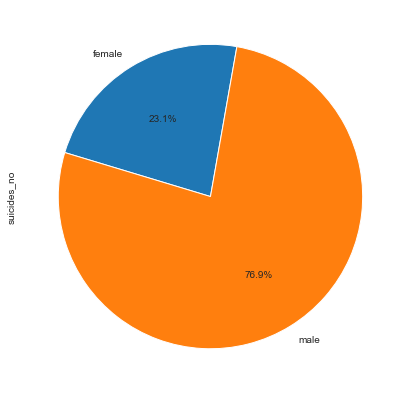

In [19]:
# sex by suicides number
data.groupby('sex')["suicides_no"].sum().plot(kind='pie',y='SEX',startangle=80,figsize=(15,7),autopct='%1.1f%%')

Men tend to commit suicides more than women

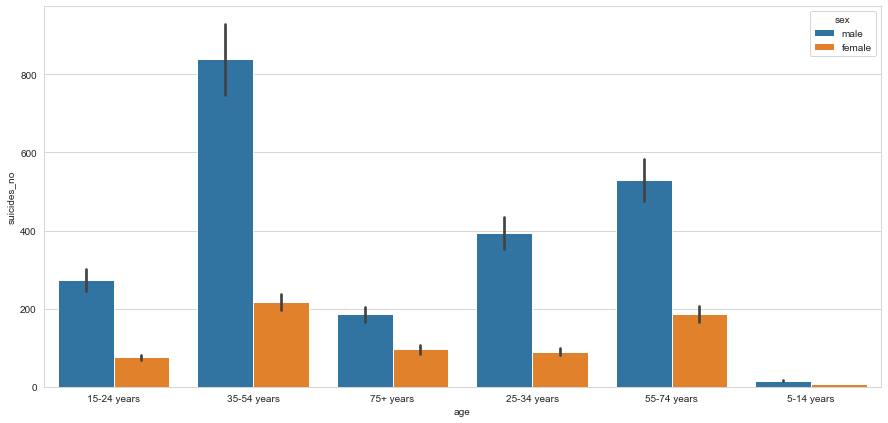

In [20]:
plt.figure(figsize=(15,7))
sb.barplot(data['age'],data['suicides_no'],hue='sex',data=data)

plt.show()

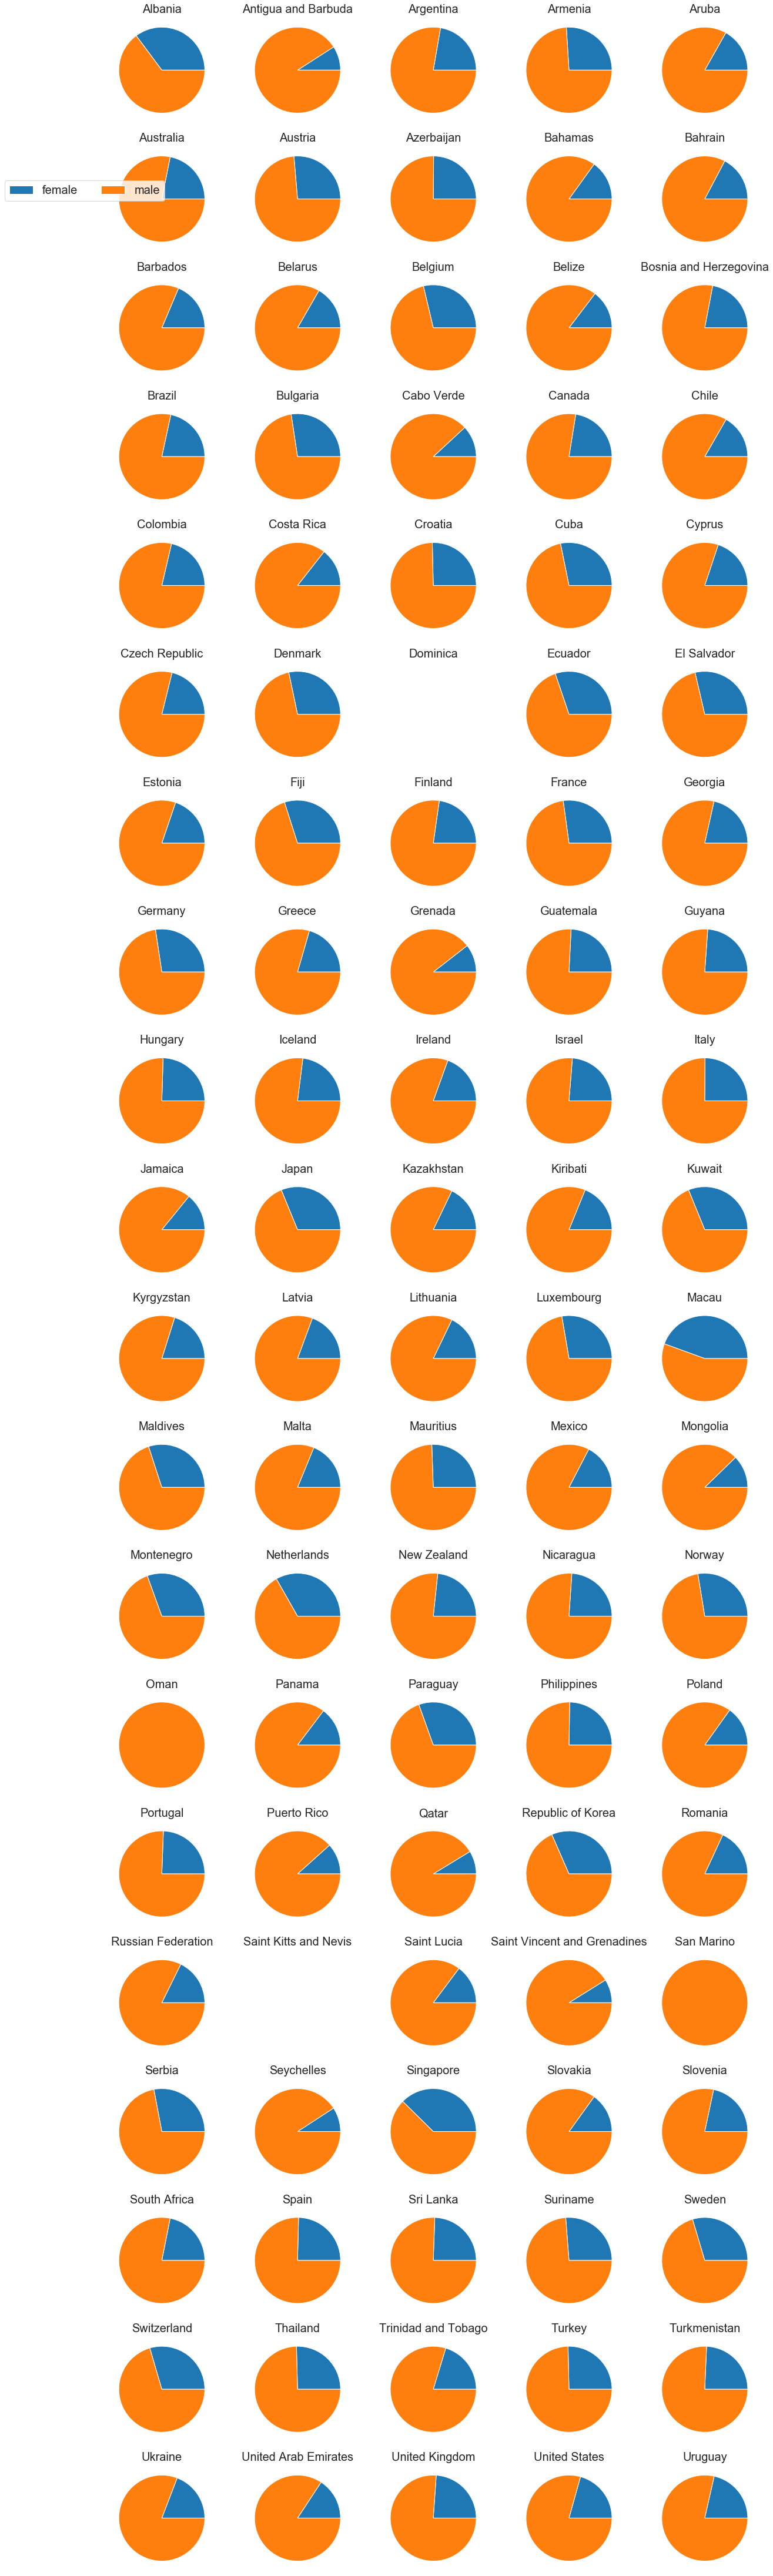

In [26]:
# cheking the number  of suicide number per gender in each country
data = data.set_index('country')
fig = plt.figure(figsize = (20,80))
for i in range(0,100):
    ax = fig.add_subplot(20,5,i+1)
    ax.set_title(data.index.unique()[i], fontsize = 20)
    sexdata = data.loc[data.index.unique()[i],:].groupby('sex').suicides_no.sum()
    ax.pie(sexdata, textprops={'size': 5})
fig.legend(sexdata.index, loc = 'lower center', ncol = 6, fontsize = 20, bbox_to_anchor = (0.1,0.7))

Men have a the highest rate of commiting suicides in all the countries, even in Portugal all the suicides recorded were commited by men

In [27]:
data.loc['Albania']

,year,sex,age,suicides_no,population,suicides_100k,gdp_per_capita,generation
country,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
...,...,...,...,...,...,...,...,...
Albania,2010,female,35-54 years,12,394593,3.04,4359,Generation X
Albania,2010,female,55-74 years,7,241491,2.90,4359,Silent
Albania,2010,female,15-24 years,6,263581,2.28,4359,Millenials


## LETS FOCUS ON THE TARGET DATA

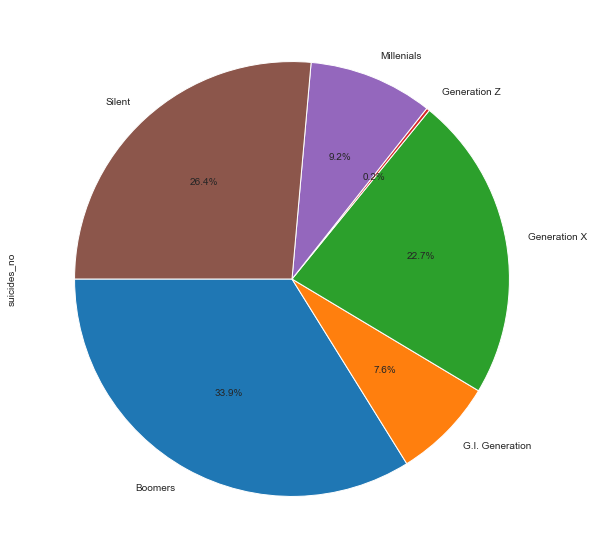

In [22]:
# sex by suicides number
data.groupby('generation')["suicides_no"].sum().plot(kind='pie',startangle=180,figsize=(15,10),autopct='%1.1f%%')

Boomers, Generation X and Silent are the generation that commit suicides  more compared to others but Boomers has the highest rate and Generation Z the lowest

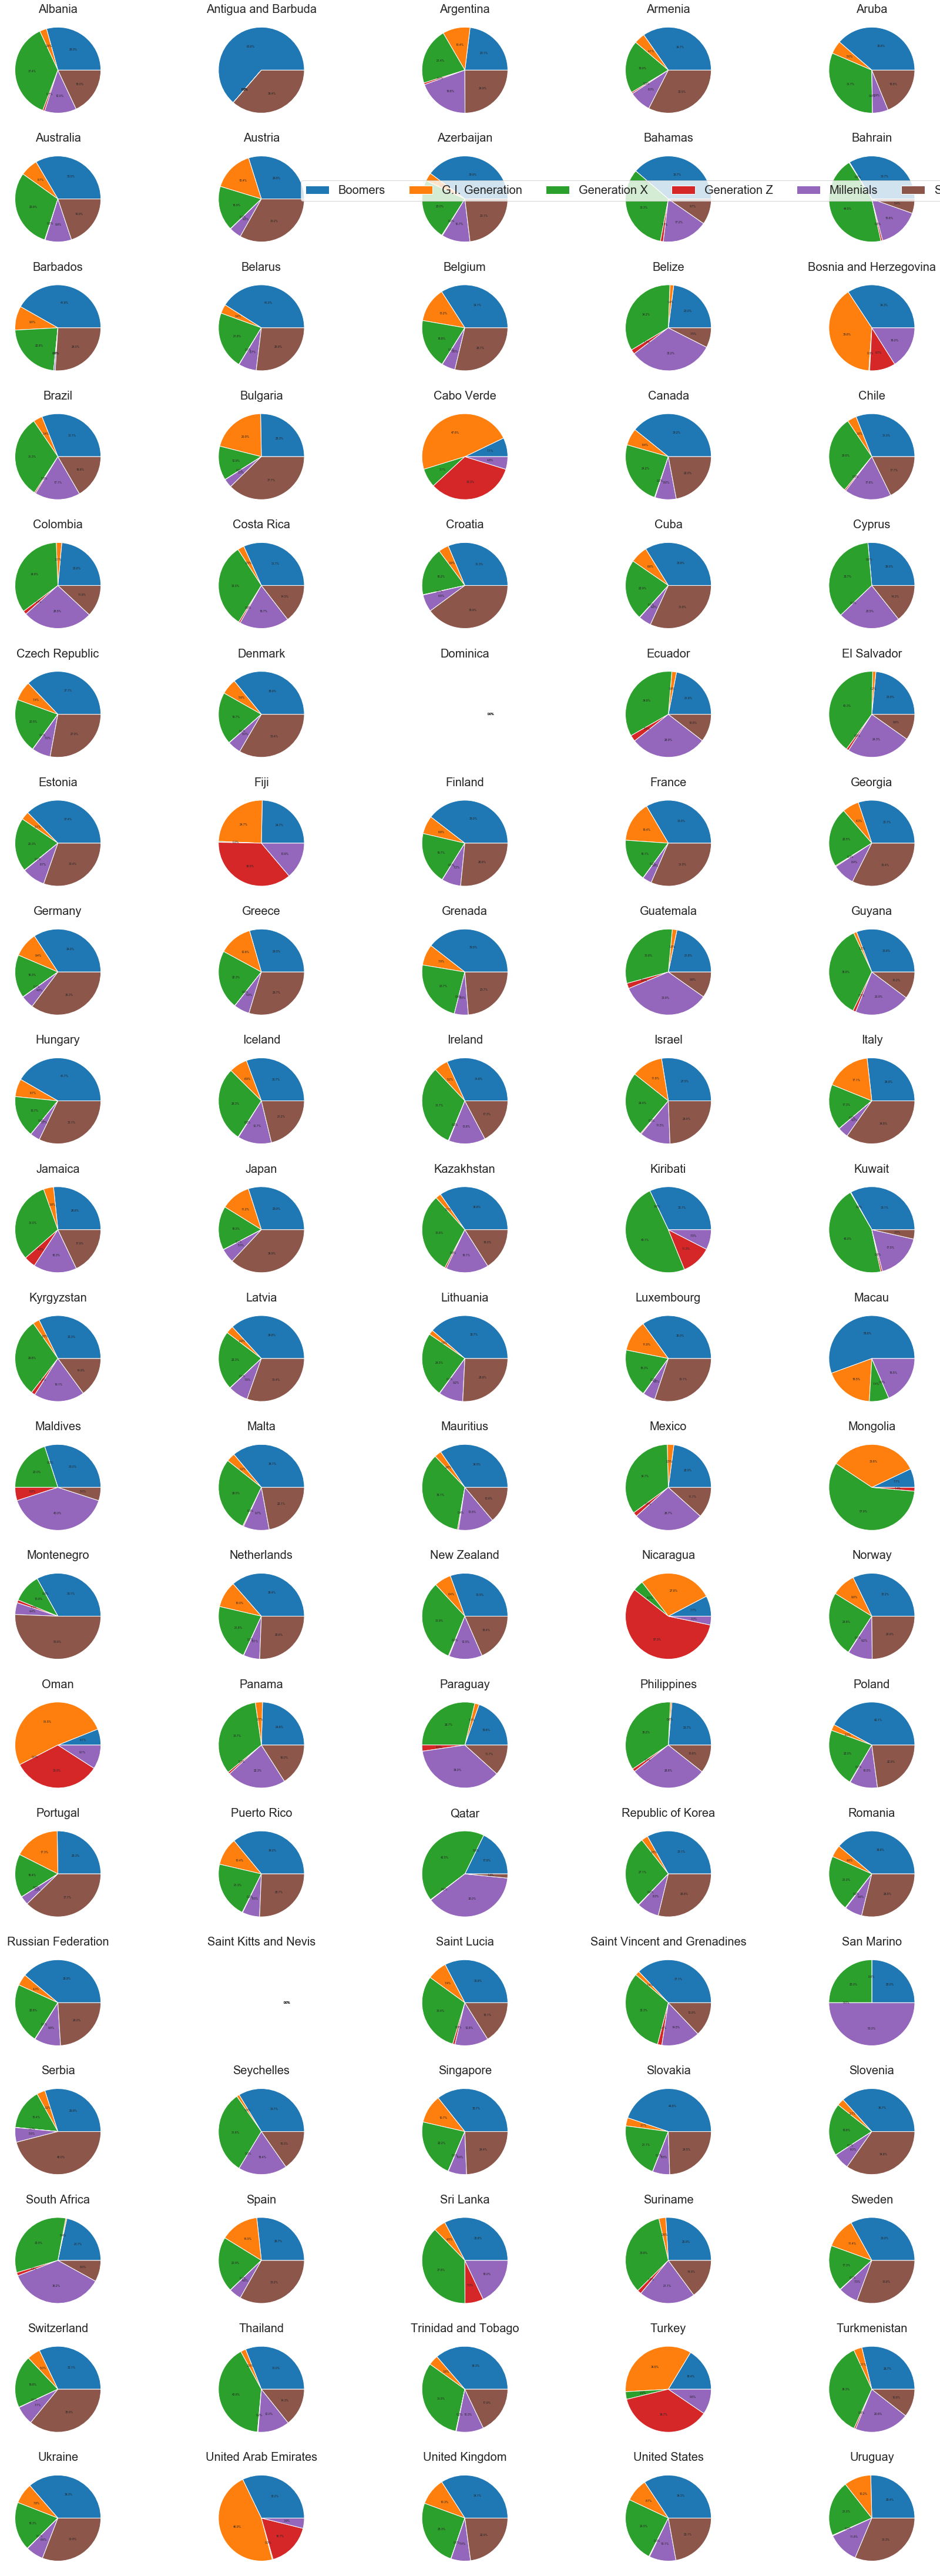

In [28]:
# cheking the number  of suicide number per gender in each country

fig = plt.figure(figsize = (30,80))
for i in range(0,100):
    ax = fig.add_subplot(20,5,i+1)
    ax.set_title(data.index.unique()[i], fontsize = 20)
    generationdata = data.loc[data.index.unique()[i],:].groupby('generation').suicides_no.sum()
    ax.pie(generationdata, textprops={'size': 5},autopct='%1.1f%%')
fig.legend(generationdata.index, loc = 'lower center', ncol = 6, fontsize = 20, bbox_to_anchor = (0.5,0.7))

As you can see, in most  countries the top 3 generation lead except in some countriest such as UAE,Turkey where the Generation Z and G.I generation have the highest rate. 

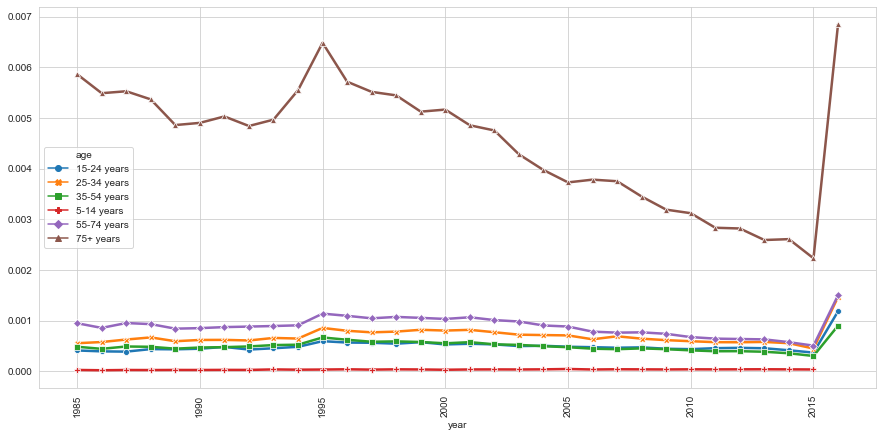

In [24]:
# Suicides 100k by population
idx = ["suicides_100k", "population"]
data_age = data.groupby(["year","age"])[idx].sum()
data_reset = data_age.copy().reset_index()
plt.figure(figsize=(15,7))
sb.lineplot(x="year", y=data_reset.suicides_100k*100/data_reset.population, hue = "age",
             data = data_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

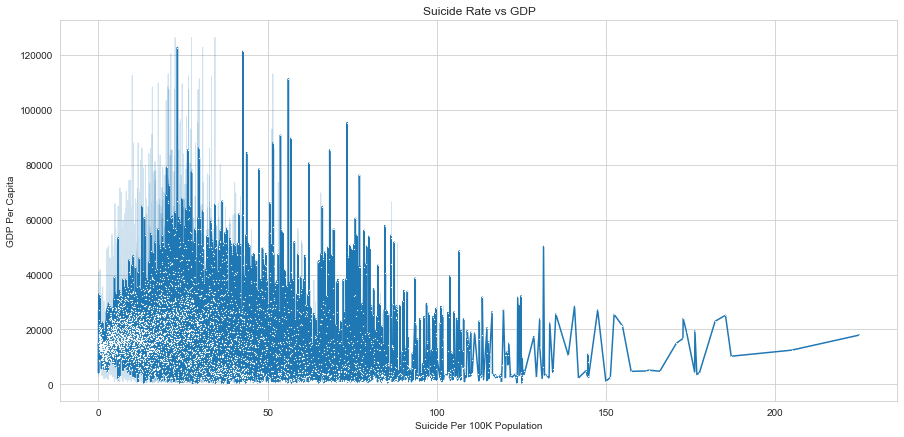

In [25]:
# SUICIDE NUMBER BY 100K PER gdp_per_capita
plt.figure(figsize=(15,7))
sb.lineplot("suicides_100k", 'gdp_per_capita', data=data, linestyle='', marker='o', markersize=0.5)
plt.xlabel("Suicide Per 100K Population")
plt.ylabel("GDP Per Capita")
plt.title("Suicide Rate vs GDP")
plt.show()

FRON THE ABOVES FIGURES WE HAVE EXTRACTED SOME MEANINGFUL INFORAMTION FROM THE DATA 
HAPPY LEARNING !!